## GEOM90042 Spatial Information Programming
## Assignment 3: Working with Raster and Digital Elevation Models

### Chihiro Matsumoto
### Semester2, 2022

***

Constant variables for files

In [1]:
import os
import rasters

raster_file = 'CLIP.tif'
filename = os.path.join(os.getcwd(), raster_file)

reproj_file = "Reprojected_raster.tif"
bilinear_file = "Resample_bilinear.tif"
nearest_file = "Resample_near.tif"

***

## Task 1: Spatial data reading and exploration
### Task 1.1-1.2 Display summary of the raster data

In [2]:
summary_dict = rasters.summary_dem(filename)
table = rasters.display_summary(summary_dict)
table


Parameter,Value
Filename,CLIP.tif
Coordinate system,EPSG:4326
"Min x, Min Lon","363305.6777 [metre], 145.4549 [degree]"
"Max x, Max Lon","451368.0183 [metre], 146.4463 [degree]"
"Min y, Min Lon","5795416.5551 [metre], -37.9788 [degree]"
"Max Lat, Max Lat","5856525.6743 [metre], -37.4368 [degree]"
"Width, Height, Cell size","3569 [columns], 1951 [rows], (0.000278, 0.000278) [degree]"
NoData,-3.4028234663852886e+38
"Min value, max value","70.1875 [metre], 1563.1005 [metre]"


### Task 1.3 Plot raster data

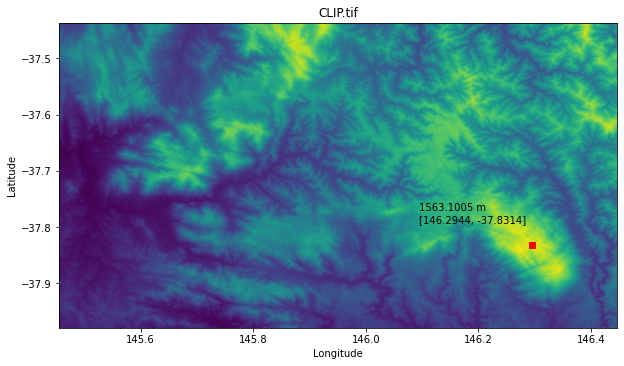

In [3]:
rasters.plot_raster(filename)

## Task 2: Processsing a raster DEM

### Task 2.1 
#### 1) Reproject
Projected coordinate system = EPSG:32755

In [4]:
rasters.project(raster_file, reproj_file)

Summary of reprojected data (ESPG:32755)

In [5]:
summary_reproj = rasters.summary_dem(reproj_file)
table_reproj = rasters.display_summary(summary_reproj)
table_reproj

summary_dict_reproj = rasters.summary_dem(reproj_file)
table_reproj = rasters.display_summary(summary_dict_reproj)
table_reproj

Parameter,Value
Filename,Reprojected_raster.tif
Coordinate system,EPSG:32755
"Min x, Min Lon","363305.6777 [metre], 145.4436 [degree]"
"Max x, Max Lon","451355.7543 [metre], 146.4501 [degree]"
"Min y, Min Lon","5795417.4607 [metre], -37.9876 [degree]"
"Max Lat, Max Lat","5856525.6743 [metre], -37.4280 [degree]"
"Width, Height, Cell size","3376 [columns], 2343 [rows], (26.081184, 26.081184) [metre]"
NoData,-3.4028234663852886e+38
"Min value, max value","70.3405 [metre], 1562.2786 [metre]"


#### 2) Resample
We resample the raster data using bilinear and nearest neighbour interpolation.

The histograms and summary tables are shown below.

##### Bilinear interpolation

In [6]:
rasters.resample_nearest_neighbour(reproj_file, bilinear_file, 4)

summary_dict_bilinear = rasters.summary_dem(bilinear_file)
table_bilinear = rasters.display_summary(summary_dict_bilinear)
table_bilinear

Parameter,Value
Filename,Resample_bilinear.tif
Coordinate system,EPSG:32755
"Min x, Min Lon","363305.6777 [metre], 145.4436 [degree]"
"Max x, Max Lon","451355.7543 [metre], 146.4501 [degree]"
"Min y, Min Lon","5795417.4607 [metre], -37.9876 [degree]"
"Max Lat, Max Lat","5856525.6743 [metre], -37.4280 [degree]"
"Width, Height, Cell size","844 [columns], 585 [rows], (104.324735, 104.458485) [metre]"
NoData,-3.4028234663852886e+38
"Min value, max value","70.5944 [metre], 1561.1417 [metre]"


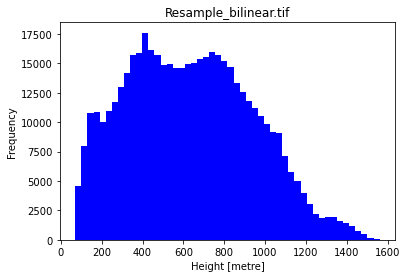

In [7]:
rasters.plot_histogram_height(bilinear_file)

##### Nearest Neightbour interpolation

In [8]:
rasters.resample_nearest_neighbour(reproj_file, nearest_file, 4)

summary_dict_near = rasters.summary_dem(nearest_file)
table_near = rasters.display_summary(summary_dict_near)
table_near

Parameter,Value
Filename,Resample_near.tif
Coordinate system,EPSG:32755
"Min x, Min Lon","363305.6777 [metre], 145.4436 [degree]"
"Max x, Max Lon","451355.7543 [metre], 146.4501 [degree]"
"Min y, Min Lon","5795417.4607 [metre], -37.9876 [degree]"
"Max Lat, Max Lat","5856525.6743 [metre], -37.4280 [degree]"
"Width, Height, Cell size","844 [columns], 585 [rows], (104.324735, 104.458485) [metre]"
NoData,-3.4028234663852886e+38
"Min value, max value","70.5944 [metre], 1561.1417 [metre]"


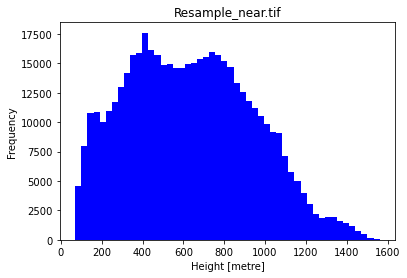

In [9]:
rasters.plot_histogram_height(nearest_file)

### Task 2.2-2.3 Slope
We compute a slope using 2FD and Maximum max methods. In each method, we use two raster data resampled by bilinear interpolation and nearest neighbour interpolation. Ths results are shown as the histograms. Also, we show the statistical properties at the end.

#### 1) 2FD - Bilinear interpolation

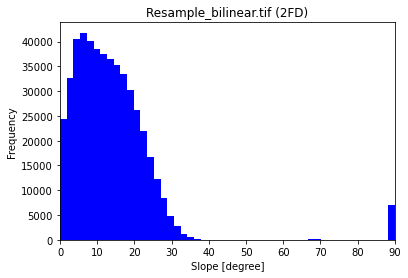

In [10]:
slope_2FD_bil = rasters.compute_slope_2FD(bilinear_file)
rasters.plot_histogram_slope(slope_2FD_bil, bilinear_file, '2FD')

#### 2) 2FD - Nearest Neighbour interpolation

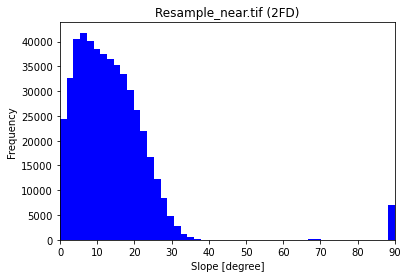

In [11]:
slope_2FD_near = rasters.compute_slope_2FD(nearest_file)
rasters.plot_histogram_slope(slope_2FD_near, nearest_file, '2FD')

#### 3) Maximum max - Bilinear interpolation

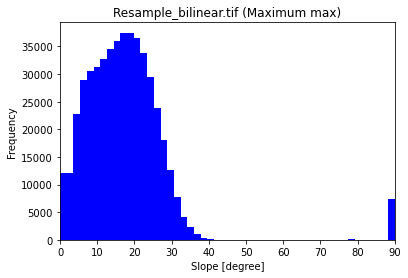

In [12]:
slope_max_bil = rasters.compute_slope_maximum_max(bilinear_file)
rasters.plot_histogram_slope(slope_max_bil, bilinear_file, 'Maximum max')

#### 4) Maximum max - Nearest Neignbour interpolation

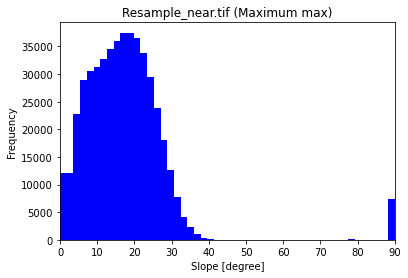

In [13]:
slope_max_near = rasters.compute_slope_maximum_max(nearest_file)
rasters.plot_histogram_slope(slope_max_near, nearest_file, 'Maximum max')

#### 5) Statistical properties

In [14]:
table = rasters.compare_slope_distribution(slope_2FD_bil, slope_2FD_near, slope_max_bil, slope_max_near)
table

Resampling,Slope,Mean,Median,Variance,SD
Bilinear,2FD,13.848,12.191,143.651,11.985
Bilinear,Max,13.848,12.191,143.651,11.985
Nearest,2FD,17.361,16.479,145.226,12.051
Nearest,Max,17.361,16.479,145.226,12.051


### Task 2-4: Report
In the previous part of Task2, we generated two coarser versions of raster data and computed the slope of them in two different ways. 

In terms of slope calculations algorithm, their histograms are clearly different. The data calculated with 2FD shows more right-skewed distribution, accordingly, the mean is smaller. Also, the 2FD algorithm indicates a smaller standard deviation than the Maximum max algorithm. Thus, the choice of algorithm for calculating slopes affects the accuracy. From this observation, the Maximum max algorithm is likely to overestimate the slope by taking the maximum slope value in eight neighbouring cells. 

With respect to the resampling method, Nearest Neighbour interpolation shows a larger standard deviation. Considering that the value at the nearest point is directly chosen, the result can have a larger standard deviation if the terrain is highly uneven. Although coarser raster data reduces the amount of calculation, the resampling method needs to be carefully chosen so as not to lose accuracy.